The curvature of a parametric expression is a fundamental metric for its analysis, it measures the amount a curve deviates from a straight line. This metric evaluated at a single point is a scalar quantity, instead, other metrics such as the tangent are vectors.

In [2]:
from sympy import *    

In [3]:
t = symbols('t')

In [4]:
# parametric function

fx = cos(t*0.5) + 1/3
fy = sin(t+1)

display(fx)
display(fy)

cos(0.5*t) + 0.333333333333333

sin(t + 1)

In [5]:
# first derivative

fx1 = fx.diff(t)
fy1 = fy.diff(t)

display(fx1)
display(fy1)

-0.5*sin(0.5*t)

cos(t + 1)

In [6]:
# second derivative

fx2 = fx1.diff(t)
fy2 = fy1.diff(t)

display(fx2)
display(fy2)

-0.25*cos(0.5*t)

-sin(t + 1)

In [7]:
# lambdify

lam_f = lambdify(t, fx2)

lam_f(4)

0.1040367091367856

By defining our parametric functions we can compute their derivatives, the following plots represent the function on the left and the derivative of the function on the right.

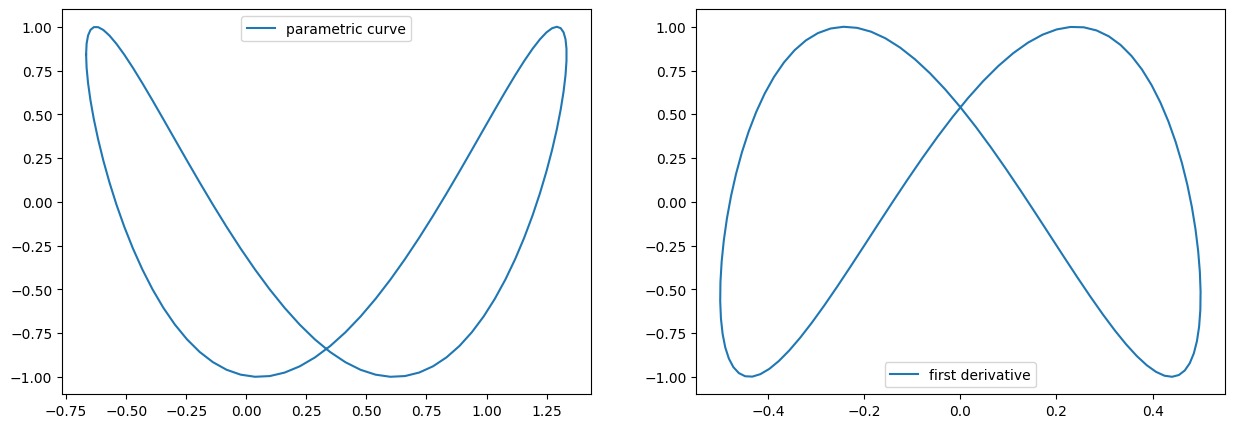

In [8]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

theta = np.linspace(-2 * np.pi, 2 * np.pi, 100)

x_l = np.array([ 

    [fx.subs({t:t1}).evalf(), 
     fy.subs({t:t1}).evalf()] for t1 in theta ] )

x_r = np.array([ 
    
    [fx1.subs({t:t1}).evalf(), 
     fy1.subs({t:t1}).evalf()] for t1 in theta ] )

axs[0].plot(*x_l.T, label='parametric curve')
axs[0].legend()

axs[1].plot(*x_r.T, label='first derivative')
axs[1].legend()

plt.show()

In [9]:
# curvature of this model: 

def f0_parametric(t1):

    return np.array( [fx.subs({t:t1}).evalf() , fy.subs({t:t1}).evalf() ], dtype=np.float64)

def f1_parametric(t1):

    return np.array( [fx1.subs({t:t1}).evalf() , fy1.subs({t:t1}).evalf() ], dtype=np.float64)

def f2_parametric(t1):

    return np.array( [fx2.subs({t:t1}).evalf() , fy2.subs({t:t1}).evalf() ], dtype=np.float64)

There are various formulas for the curvature, in our case we avoid the calculus of arc length and the curvature can be computed in terms of general parametrization $f(t) = (x(t), y(t))$. The main constrain here is the curve needs to have first and second derivatives defined on its domain.

$$
\kappa  = \frac{{\left\| {\vec r'\left( t \right) \times \vec r''\left( t \right)} \right\|}}{{{{\left\| {\vec r'\left( t \right)} \right\|}^3}}}
$$

In [10]:
import math

def curvature(t):
      
        v = f1_parametric(t)

        a = f2_parametric(t)

        w = np.cross(v,a)

        magnitude = np.linalg.norm(w)

        speed = np.linalg.norm(v)

        return magnitude / math.pow(speed,3)

In [11]:
curvature(0.5)

48.56510110071937

In [12]:
curvature = np.array([curvature(t1) for t1 in theta])

print(curvature)

[8.56379705e-01 1.70064453e+00 4.27309491e+00 1.47773352e+01
 5.06834155e+01 2.93411657e+01 7.39602504e+00 2.45075284e+00
 1.04028160e+00 5.13493680e-01 2.74721898e-01 1.49691068e-01
 7.59271470e-02 2.72969769e-02 8.62213098e-03 3.85205675e-02
 6.65808473e-02 9.59815101e-02 1.29757894e-01 1.71477651e-01
 2.25997766e-01 3.00552342e-01 4.06505934e-01 5.62258278e-01
 7.97823691e-01 1.16061837e+00 1.71640057e+00 2.51979368e+00
 3.49635074e+00 4.25797011e+00 4.26870545e+00 3.52524627e+00
 2.55995867e+00 1.76215540e+00 1.20906535e+00 8.48116845e-01
 6.14670129e-01 4.61904908e-01 3.60209745e-01 2.91586143e-01
 2.45193701e-01 2.14564980e-01 1.96018172e-01 1.87846837e-01
 1.90069268e-01 2.04736453e-01 2.37108471e-01 2.98702987e-01
 4.15237977e-01 6.49469156e-01 1.17760809e+00 2.60322731e+00
 7.61473801e+00 2.97967880e+01 5.03596756e+01 1.44647661e+01
 4.09927358e+00 1.55852415e+00 7.20717162e-01 3.73239774e-01
 2.03200593e-01 1.08507104e-01 4.94391609e-02 8.25073306e-03
 2.40261183e-02 5.257006

The following code involves using a simple two color palette to plot the curvature metric along the curve. Also, on the right, there is the evolution of the curvature based on the parameterized value t.

In [13]:
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap    

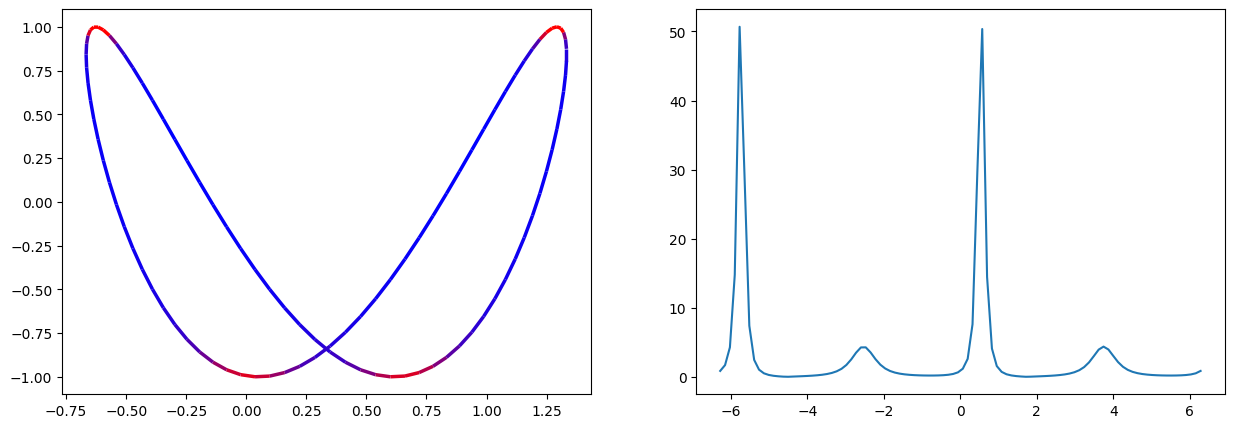

In [20]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

cmap = LinearSegmentedColormap.from_list("", [(0, 0, 1), (1, 0, 0)])

points = x_l.reshape(-1,1,2)

segments = np.concatenate([points[:-1],points[1:]], axis=1)

lc = LineCollection(segments, cmap=cmap, linewidth=2.5)

lc.set_array(curvature.clip(0,5))

axs[0].add_collection(lc)
axs[0].autoscale()

axs[1].plot(theta, curvature)

plt.show()